## 7	VALORACION DE BONOS Y ACCIONES

## 7.1	Estructura temporal de tasas de interés

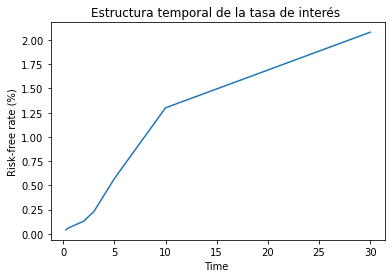

In [1]:
from matplotlib.pyplot import *
time=[3/12,6/12,2,3,5,10,30]
rate=[0.04,0.06,0.13,0.23,0.57,1.30,2.08]
title("Estructura temporal de la tasa de interés ")
xlabel("Time ")
ylabel("Risk-free rate (%)")
plot(time,rate)
show()


In [2]:
import pandas as pd
import numpy as np
x=pd.Series([1,2,np.nan,np.nan,6])
x.interpolate()


0    1.000000
1    2.000000
2    3.333333
3    4.666667
4    6.000000
dtype: float64

In [3]:
import pandas as pd
import numpy as np
nan=np.nan
x=pd.Series([0.57,nan,nan,nan,nan,2.08])
x.interpolate()


0    0.570
1    0.872
2    1.174
3    1.476
4    1.778
5    2.080
dtype: float64

In [4]:
import pandas as pd
spread=pd.read_pickle("c:/Users/spreadBasedOnCreditRating.pkl")
spread


1       2       3       5       7      10     30 
Rating                                                                   
Aaa/AAA              5.00    8.00   12.00   18.00   28.00   42.00   65.00
Aa1/AA+             10.00   18.00   25.00   34.00   42.00   54.00   77.00
Aa2/AA              14.00   29.00   38.00   50.00   57.00   65.00   89.00
Aa3/AA-             19.00   34.00   43.00   54.00   61.00   69.00   92.00
A1/A+               23.00   39.00   47.00   58.00   65.00   72.00   95.00
A2/A                24.00   39.00   49.00   61.00   69.00   77.00  103.00
A3/A-               32.00   49.00   59.00   72.00   80.00   89.00  117.00
Baa1/BBB+           38.00   61.00   75.00   92.00  103.00  115.00  151.00
Baa2/BBB            47.00   75.00   89.00  107.00  119.00  132.00  170.00
Baa3/BBB-           83.00  108.00  122.00  140.00  152.00  165.00  204.00
Ba1/BB+            157.00  182.00  198.00  217.00  232.00  248.00  286.00
Ba2/BB             231.00  256.00  274.00  295.00  312.00  330.00  367.00
Ba3/BB-            305.00  330.00  350.00  372.00  392.00  413.00  449.00
B1/B+              378.00  404.00  426.00  450.00  472.00  495.00  530.00
B2/B               452.00  478.00  502.00  527.00  552.00  578.00  612.00
B3/B-              526.00  552.00  578.00  604.00  632.00  660.00  693.00
Caa/CCC+           600.00  626.00  653.00  682.00  712.00  743.00  775.00
US Treasury Yield    0.13    0.45    0.93    1.74    2.31    2.73    3.55

## 7.2	Relación riesgo y rentabilidad. La Duración

In [5]:
100/(1+0.05)

95.23809523809524

In [6]:
pv2=100/(1+0.05)
w1=100/(100+pv2)
w1


0.5121951219512195

In [7]:
w2= pv2/(100+pv2)
w2


0.4878048780487805

In [8]:
w1*1 + w2*2

1.4878048780487805

In [9]:
fv=100*(1+0.05)
fv


105.0

In [10]:
w1=105/(100+105)
w1


0.5121951219512195

In [11]:
w2=100/(100+105)
w2


0.4878048780487805

In [12]:
pv1=100/(1+0.05)
pv2=100/(1+0.05)**2
w1= pv1/(pv1+pv2)
w1


0.5121951219512195

In [13]:
1- w1

0.4878048780487805

In [14]:
pv1+pv2

185.94104308390024

In [21]:
import math as m
def duration(t,valor_nominal,y,tasacupon):
    n=list(range(1,t+1)) 
    cupon=valor_nominal*tasacupon
    ultimoflujo=valor_nominal*tasacupon+valor_nominal
    flujoxperiodo=[cupon]*(len(n)-1)+[ultimoflujo] 

    B=0
    for k in range(0,t):
        B=B+flujoxperiodo[k]*(m.exp(-y*n[k]))
       
    D=0
    for i in range(0,t):
        D+=n[i]*flujoxperiodo[i]*m.exp(-y*n[i])/B
        
    return (B,D)
duration(2,100,0.05,0.10)






(109.04441022896269, 1.9127667871738314)

## 7.3	Evaluación de bonos y rendimiento hasta el vencimiento

In [16]:
import numpy as np
import numpy_financial as npf
npf.pv(0.024, 3, 0.08*100, 100)


-116.0247325897217

In [17]:
(1000/717.25)**(1/10)-1

0.033791469771228044

In [18]:
import numpy as np
import numpy_financial as npf
npf.rate(5, 0.03*1000, -818, 1000, when='end')


0.07498180431487073

In [19]:
# Para el bono cero cupón
import numpy as np
import numpy_financial as npf
p0=npf.pv(0.04,15, 0, -100)
p1=npf.pv(0.05,15, 0, -100)
(p1-p0)/p0


-0.1337153811552842

In [20]:
p0

55.526450271327484

In [21]:
p1

48.101709809096995

In [22]:
# Para el bono con cupón
p0=npf.pv(0.04,30, -0.09*100, -100)
p1=npf.pv(0.05,30, -0.09*100, -100)
(p1-p0)/p0


-0.13391794539315816

In [23]:
p0

186.46016650332245

In [24]:
p1

161.48980410753134

## 7.4	Valoración de acciones

In [25]:
import numpy as np
import numpy_financial as npf
npf.pv(0.12,1, 0, 50+1)


-45.535714285714285

In [26]:
1.5/(1+0.14)+(2+78)/(1+0.14)**2

62.873191751308084

In [27]:
(35-30+1)/30

0.2

In [28]:
4/(0.18-0.02)

25.0